In [1]:
from typing import Union

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import models.ssmrk as ssmrk
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# abbrs = ("S01", "S02", "S03", "S04", "S05", "S28", "S29", "S30", "S31")
# abbrs = ("S06", "S07", "S08", "S09", "S10", "S28", "S29", "S30", "S31")
abbrs = ("S01", "S02", "S03", "S04", "S05", "S06", "S07", "S08", "S09", "S10", "S21", "S22","S23", "S28", "S29", "S30", "S31")
colors = u.COLORS
cols = {a: colors[u.get_terrain(a)] for a in abbrs}


def add_terrain_legend(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure]):
    legend_handles = [mpatches.Patch(color=col, label=lab) for lab, col in colors.items()]
    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    mpl_elem.legend(
        handles=legend_handles, ncol=len(colors), bbox_to_anchor=(0.5, -0.03), loc="upper center", title="Terrain"
    )


In [3]:
dfs = {}
for abbr in abbrs:
    preprocess(abbr)
    ssmrk_df, pentzer_df = ssmrk.ssmrk_main(abbr);
    dfs[abbr] = {"s": ssmrk_df, "p": pentzer_df}


S01 : Exported merged CSV in data/runs/S01/elec/S01_2022-08-12-16-15-17-VG-LinGrandAxe_elec_motor_data.csv
Primary topic : mcu_status
S01 : Exported merged CSV in data/runs/S01/merged/S01_2022-08-12-16-15-17-VG-LinGrandAxe_m.csv
S01 : Exported cut CSV in data/runs/S01/merged/S01_2022-08-12-16-15-17-VG-LinGrandAxe_mc.csv
Constant columns : 19
['/mcu/status/current_48v', '/warthog_velocity_controller/odom/ang_twi/x', '/warthog_velocity_controller/odom/ang_twi/y', '/warthog_velocity_controller/odom/lin_twi/y', '/warthog_velocity_controller/odom/lin_twi/z', '/warthog_velocity_controller/odom/orientation/pitch', '/warthog_velocity_controller/odom/orientation/roll', '/warthog_velocity_controller/odom/orientation/x', '/warthog_velocity_controller/odom/orientation/y', '/warthog_velocity_controller/odom/position/z', '/imu_and_wheel_odom/ang_twi/x', '/imu_and_wheel_odom/ang_twi/y', '/imu_and_wheel_odom/ang_twi/z', '/imu_and_wheel_odom/lin_twi/y', '/imu_and_wheel_odom/lin_twi/z', '/warthog_veloci

In [4]:
figdir = u.get_figdir("summary")
ssmrkgifs = figdir / "ssmrk"


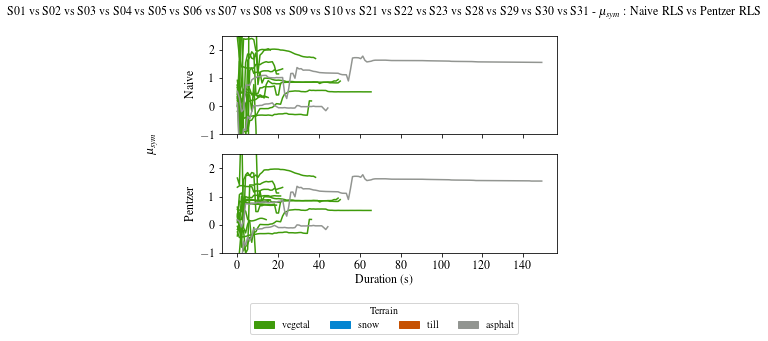

In [5]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)

for abbr in abbrs:
    col = cols[abbr]
    ax1.plot(dfs[abbr]["s"].time_rel, dfs[abbr]["s"].mu_sym, col, label=abbr)
    ax2.plot(dfs[abbr]["p"].time_rel, dfs[abbr]["p"].pentz_sym_m, col, label=abbr)
ax1.set_ylabel("Naive")
ax2.set_ylabel("Pentzer")
# ax1.legend()
# ax2.legend()
ax1.set_ylim((-1, 2.5))
ax2.set_ylim((-1, 2.5))
add_terrain_legend(fig)
fig.supylabel("$\mu_{sym}$", x=-0.05)
fig.supxlabel("Duration (s)")
fig.suptitle(f"{' vs '.join(abbrs)} - $\mu_{{sym}}$ : Naive RLS vs Pentzer RLS")

fig.savefig(ssmrkgifs / f"{''.join(abbrs)}_comp_m_sym.jpg", bbox_inches="tight")


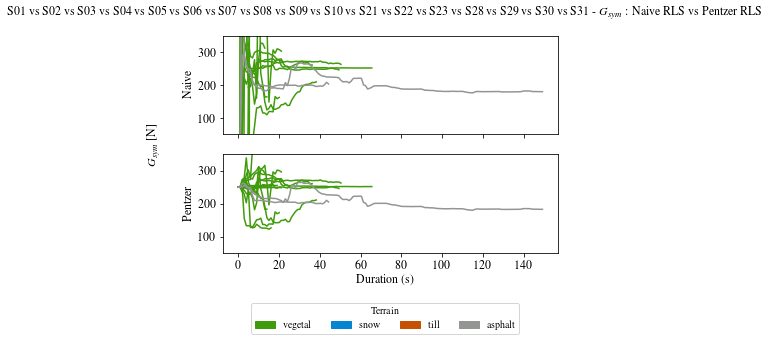

In [6]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)

for abbr in abbrs:
    col = cols[abbr]
    ax1.plot(dfs[abbr]["s"].time_rel, dfs[abbr]["s"].G_sym, col, label=abbr)
    ax2.plot(dfs[abbr]["p"].time_rel, dfs[abbr]["p"].pentz_sym_G, col, label=abbr)
ax1.set_ylabel("Naive")
ax2.set_ylabel("Pentzer")
# ax1.legend()
# ax2.legend()
ax1.set_ylim((50,350))
ax2.set_ylim((50,350))
add_terrain_legend(fig)
fig.supylabel("$G_{sym}$ [N]", x=-0.05)
fig.supxlabel("Duration (s)")
fig.suptitle(f"{' vs '.join(abbrs)} - $G_{{sym}}$ : Naive RLS vs Pentzer RLS")

fig.savefig(ssmrkgifs / f"{''.join(abbrs)}_comp_G_sym.jpg", bbox_inches="tight")

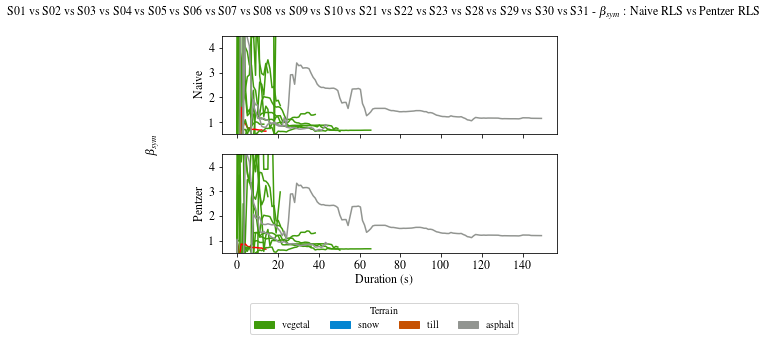

In [7]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)

for abbr in abbrs:
    col = cols[abbr]
    col = "r" if abbr in ("S23",) else col
    ax1.plot(dfs[abbr]["s"].time_rel, dfs[abbr]["s"].B_sym, col, label=abbr)
    ax2.plot(dfs[abbr]["p"].time_rel, dfs[abbr]["p"].pentz_sym_B, col, label=abbr)
ax1.set_ylabel("Naive")
ax2.set_ylabel("Pentzer")
# ax1.legend()
# ax2.legend()
ax1.set_ylim((0.5, 4.5))
ax2.set_ylim((0.5, 4.5))
add_terrain_legend(fig)
fig.supylabel("$\\beta_{sym}$", x=-0.05)
fig.supxlabel("Duration (s)")
fig.suptitle(f"{' vs '.join(abbrs)} - $\\beta_{{sym}}$ : Naive RLS vs Pentzer RLS")

fig.savefig(ssmrkgifs / f"{''.join(abbrs)}_comp_B_sym.jpg", bbox_inches="tight")


In [8]:
# fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)

# ax1.plot(dfs[abbr1]["s"].time_rel, dfs[abbr1]["s"].B_sym, label=abbr1)
# ax2.plot(dfs[abbr1]["p"].time_rel, dfs[abbr1]["p"].pentz_sym_B, label=abbr1)
# ax1.plot(dfs[abbr2]["s"].time_rel, dfs[abbr2]["s"].B_sym, label=abbr2)
# ax2.plot(dfs[abbr2]["p"].time_rel, dfs[abbr2]["p"].pentz_sym_B, label=abbr2)
# ax1.set_ylabel("Naive")
# ax2.set_ylabel("Pentzer")
# ax1.legend()
# ax2.legend()
# ax1.set_ylim((-20, 25))
# ax2.set_ylim((-20, 20))
# add_terrain_legend(fig)
# fig.supylabel("$\\beta_{sym}$", x=-0.05)
# fig.supxlabel("Duration (s)")
# fig.suptitle(f"{abbr1} vs {abbr2} - $\\beta_{{sym}}$ : Naive RLS vs Pentzer RLS")

# fig.savefig(ssmrkgifs / f"{abbr1}{abbr2}_comp_B_sym.jpg", bbox_inches="tight")